# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [53]:
# Get the datasets
#!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
#!wget http://huang.eng.unt.edu/CSCE-5218/train.dat

!curl -O http://huang.eng.unt.edu/CSCE-5218/test.dat
!curl -O http://huang.eng.unt.edu/CSCE-5218/train.dat



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2844  100  2844    0     0  31095      0 --:--:-- --:--:-- --:--:-- 32318
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11244  100 11244    0     0   156k      0 --:--:-- --:--:-- --:--:--  161k


In [54]:
# Take a peek at the datasets
#!head train.dat
#!head test.dat

!type train.dat
!type test.dat




A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
1	0	1	1	1	0	0	0	1	1	1	0	1	1
0	1	1	0	1	0	1	1	1	1	1	1	1	1
0	0	1	1	0	0	1	0	0	1	1	1	1	0
1	0	1	1	0	0	1	1	0	1	0	0	1	1
0	0	1	1	0	0	0	0	1	0	1	1	1	0
1	0	0	0	0	0	1	0	1	1	0	1	1	0
0	1	1	1	1	1	0	0	1	0	1	0	1	1
1	0	0	0	1	0	1	1	1	1	1	1	1	0
1	0	0	0	0	1	1	0	1	1	1	1	1	0
1	0	0	1	0	1	0	1	1	0	0	1	1	0
0	0	1	1	0	1	1	0	0	0	0	1	1	0
1	1	1	0	0	1	1	1	1	1	0	1	1	1
0	1	1	1	1	1	0	0	0	1	0	1	1	0
0	0	1	1	0	1	0	1	0	1	1	1	1	0
1	0	0	1	0	1	1	1	1	0	0	1	1	0
0	0	1	0	0	0	1	0	0	0	0	0	1	0
1	0	1	0	0	0	1	1	0	0	0	1	1	0
1	0	0	0	0	1	0	0	0	1	0	1	1	0
1	0	0	0	1	1	1	0	0	1	0	1	1	0
1	0	0	0	0	0	1	1	1	1	1	0	1	0
0	0	1	1	0	1	0	1	0	0	1	0	1	0
0	1	1	0	0	0	1	1	1	1	0	1	1	0
0	0	0	0	1	1	1	1	0	0	0	0	1	0
0	1	1	0	1	1	1	1	0	0	0	1	1	0
0	1	0	1	0	0	0	1	0	0	0	1	1	0
1	0	

### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [55]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data

#IMPLEMENTATION OF DOT ARRAY
def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(x*y for x, y in zip(array1, array2))
#The above line calculates the dot product of both arrays and 
#zip function is used to pair the elements from arrays, and then deploys the expression to multiply the pairs. 
#sum of these product represents the dot product of the two arrays.

#IMPLEMENTATION OF Sigmoid Function on X
def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1/(1+math.exp(-x))
#in above line, Signmoid function σ(x) basic formula is 1/exponential function of the negation of 'x',​


#INPLEMENTATION OF OUT PUT OF THE MODEL
# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weight,instance))

#As requesed the above line applies sigmoid function to result of dot product of the weight and the instance. 
#This will inturn calculates the output of the perceptron model at any given instance.


#IMPLEMENTATION OF PREDICTION MODEL
# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights,instance)>= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    #TODO: Weight initialization
#This steps initalizes the weights begining with zero
    weights = [0] * (len(instances[0])-1)
    for _ in range(epochs):
        for instance in instances:
            
#TODO: Caluculating weights of input, output and errors
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            
#TODO:  Updating weignts according to error and learning rate
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights
    

## Run it

In [56]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

Usually the perceptron model always uses the sigmoid activation so that it can result in all outputs between 0 and 1 where the prediction function only makes the binary predictions. This can be some times used in later stages to evaluate the accuracy but if the predict function is used to replace the sigmoid, this will skip the sigmoid activation which changes entire character of moder and goes to binary prediction model when output = predict(weights, instance) is used. And using sigmoid activation will help to compute gradients during taining and updats the weights.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [57]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

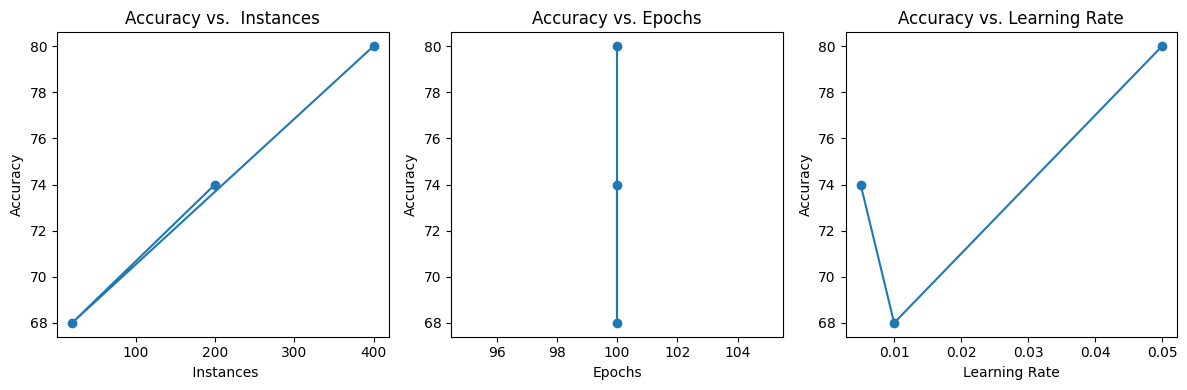

In [52]:
### Question 3
#Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
#- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
#- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
#- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)
#I have plotted a graph with relation between the accuracy vs the hyperparameters.
#1. Accuracy vs. Instances: It shows a nonlinear relation between the accuracy and instanstaces, and can see that there is a high accuracy 80.0% when it’s trained with 400 instances but only 68% while using 20 instances, which may confirm that the number of instances will have significant impact on performance on larger datasets
#2. Accuracy vs. Epochs: We have used all the sets with the same number of epochs, 100. But can see that there is a variance in accuracy- which is based on the number of training instances. From this I can say that the epochs may be crucial but may not be significant, Accuracy may be marjorly depend on data size and learning rate.
#3. Accuracy vs. Learning Rate: When the plot is drawn against the accuracy and LR, we can wee that highest accurary 80% is obtained wih a LR of 0.050 and lower with lower rate  74%of 0.005. This will suggest that the LR will help in getting higher accuracy. 
#Finally I can conclude that all the hyperparameters will have significant impact on the accuracy. Number of epochs, LR and instances should be decided depended on the size of data sets and should be balanced to improve the accuracy. 

#Answer for 3A- Not it is not needed to train with all the training datasets for higher accuracy,since the relation between training and accuracy is not linear.
#Answer for 3B- The second run accuracy is not related to the amount of training data, infact the accuracy depends on the hyperparameters. if compared both the runs, the learning rate for first run is 0.05 and for second run is 0.005
#Answer for 3C- Higher accuraccy can be acheived with higher hyperparameter and combination of various parameter if needed. So yes there is a chance that we can get higher accuracy with 80.0
#Answer for 3D: Training with more epochs is not necessary benefitial for over all performance. Using more epochs is completely dependent on the behaviour of learning process and data characterstics like convergence, overfitting, resource,and performance


#Code for the Plot
import matplotlib.pyplot as plt
results = [
    {"#tr": 200, "epochs": 100, "lr": 0.005, "accuracy": 74.0}, 
    {"#tr": 20, "epochs": 100, "lr": 0.010, "accuracy": 68.0},
    {"#tr": 400, "epochs": 100, "lr": 0.050, "accuracy": 80.0},

#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 80.0

]
plt.figure(figsize=(12, 4))
# Plotting accuracy Vs instances
plt.subplot(1, 3, 1)
plt.plot([result["#tr"] for result in results], [result["accuracy"] for result in results], marker='o')
plt.title('Accuracy vs.  Instances')
plt.xlabel(' Instances')
plt.ylabel('Accuracy')

# Plotting accuracy Vs epochs
plt.subplot(1, 3, 2)
plt.plot([result["epochs"] for result in results], [result["accuracy"] for result in results], marker='o')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Plotting accuracy Vs rate
plt.subplot(1, 3, 3)
plt.plot([result["lr"] for result in results], [result["accuracy"] for result in results], marker='o')
plt.title('Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


